<a href="https://colab.research.google.com/github/tarun-bandi/ml_notes/blob/main/Convolution_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [8]:
!pip install scipy

(1068, 1600)


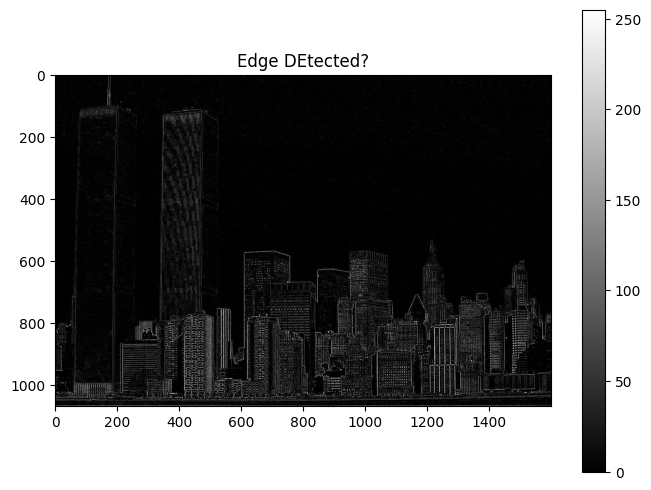

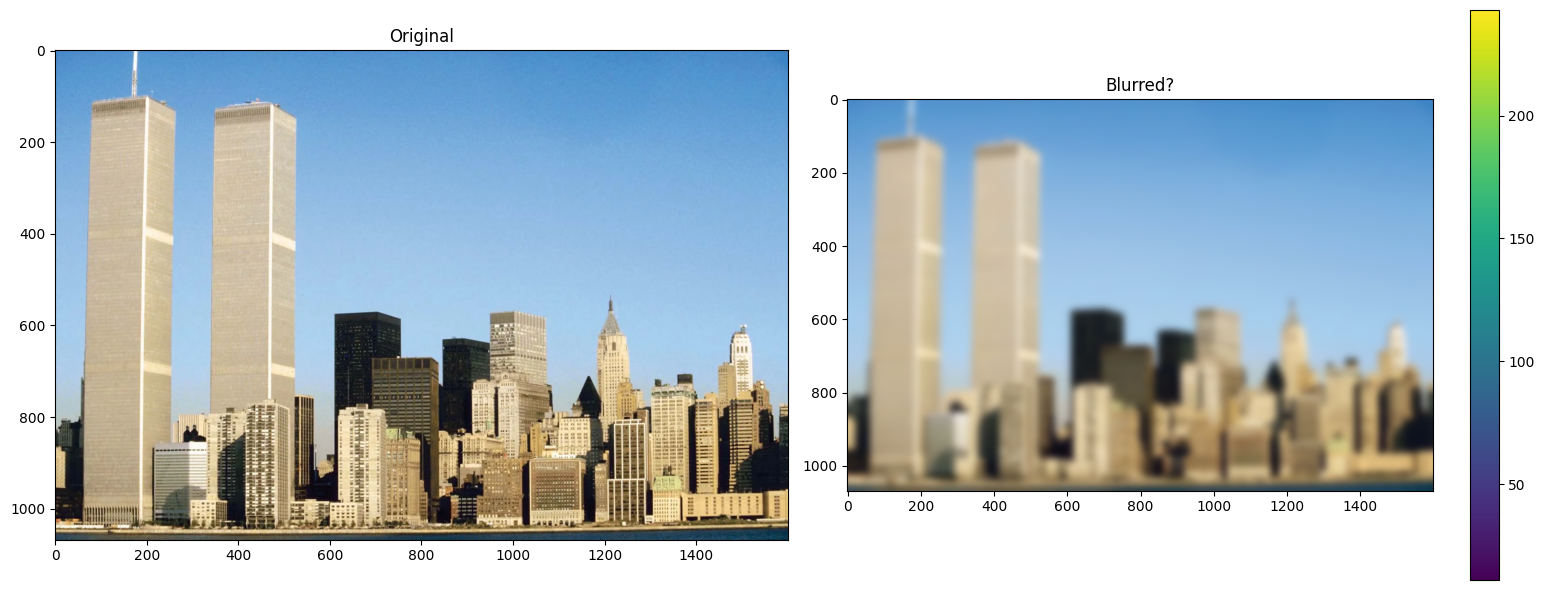

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def detect_edges(image_path):
    # Read image and convert to grayscale
    img = np.array(Image.open(image_path).convert("L"))
    print(img.shape)
    # img = img[:, :, 0]
    img = img.astype(np.int16)
    # Define Sobel kernels
    edge_kernel = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])

    results = convolve2d(img, edge_kernel, mode="same")
    results[results > 255] = 255
    results[results < 0] = 0
    results = results.astype(np.uint8)
    plt.figure(figsize=(8, 6))
    plt.imshow(results, cmap="grey")
    plt.colorbar()
    plt.title('Edge DEtected?')
    plt.show()

def box_blur(image_path, kernel_size=7):  # Increased default kernel size
    img = np.array(Image.open(image_path))
    # Create larger kernel
    box_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    blurred = []
    for i in range(3):
        # You can apply the convolution multiple times for stronger blur
        temp = img[:, :, i]
        for _ in range(2):  # Apply blur twice
            temp = convolve2d(temp, box_kernel, mode='same', boundary="symm")
        blurred.append(temp)

    combined = np.stack(blurred, axis=2)
    combined = combined.astype(np.uint8)

    plt.figure(figsize=(8, 6))
    plt.imshow(combined)
    plt.colorbar()
    plt.title(f'Blurred (kernel size: {kernel_size}x{kernel_size})')
    plt.show()

def box_blur(image_path, times=2, size=7):
    img = np.array(Image.open(image_path))
    box_kernel = np.array([[1/(size*size) for i in range(size)] for j in range(size)])
    blurred = []
    for i in range(3):
      temp = img[:, :, i]
      for _ in range(times):
        temp = (convolve2d(temp, box_kernel, mode='same', boundary="symm"))
      blurred.append(temp)

    combined = np.stack(blurred, axis = 2)

    combined = combined.astype(np.uint8)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first position
    plt.imshow(img)
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(combined)
    plt.colorbar()
    plt.title('Blurred?')
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()




# Usage:
detect_edges('twintowers.webp')
box_blur('twintowers.webp',times=25)